In [32]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math 

In [33]:
filename = '/Users/usuario-mac/Desktop/TNG300-1/stellar/WEB_CIC_256_DM_TNG300-2.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
density_smooth = f['density_smooth'][:,:,:]
lambda1 = f['lambda1'][:,:,:]
lambda2 = f['lambda2'][:,:,:]
lambda3 = f['lambda3'][:,:,:]
f.close()
np.shape(lambda1)[0]

KeysView(<HDF5 file "WEB_CIC_256_DM_TNG300-2.hdf5" (mode r)>)


256

In [34]:
Snap = []  #SnapFormation
ZF=[] #z de formation
mass=[] #masa de las galaxias (SubhaloMassInRadType[0,4])
x=[] #coordinates
y=[]
z=[]
archivo=open("TNG1_todas.dat","r")

for i in (row.strip().split() for row in archivo): 

    Snap.append(float(i[0])) #convierte las columnas de los datos en listas para operar los datos
    ZF.append(float(i[1]))
    mass.append(float(i[2]))
    x.append(float(i[3])/1000) #coordenadas en Mpc/h
    y.append(float(i[4])/1000)
    z.append(float(i[5])/1000)
    
print(len(mass), len(x),len(y),len(z),max(x), max(y), max(z), min(ZF), max(ZF))

495093 495093 495093 495093 205.0 204.999 204.999 2.22045e-16 9.00234


In [35]:
hubble = 0.677
BoxSize=205
print(BoxSize)
delta_box = BoxSize*(1/hubble)/np.shape(lambda1)[0]
print(delta_box)

pos=np.array([x,y,z]).T
print(pos.shape)

posx=pos[:,0];
posy=pos[:,1];
posz=pos[:,2];

#print(x)
ii_box = np.int_(posx//delta_box)
jj_box = np.int_(posy//delta_box)
kk_box = np.int_(posz//delta_box)
print('here')
lambda1_galaxy = lambda1[ii_box, jj_box, kk_box]
lambda2_galaxy = lambda2[ii_box, jj_box, kk_box]
lambda3_galaxy = lambda3[ii_box, jj_box, kk_box]
density_galaxy = density_smooth[ii_box, jj_box, kk_box]

print(lambda1_galaxy.shape, len(lambda1_galaxy), lambda1_galaxy)

205
1.1828378877400294
(495093, 3)
here
(495093,) 495093 [0.5645329  0.5681063  0.6700627  ... 0.71946996 0.2737225  1.0027392 ]


In [38]:
sigma=lambda1_galaxy+lambda2_galaxy+lambda3_galaxy
print(sigma.shape)

q2=0.5*((lambda2_galaxy-lambda1_galaxy)**2 + (lambda3_galaxy-lambda1_galaxy)**2 + (lambda3_galaxy-lambda2_galaxy)**2)
alpha= np.sqrt(q2)/(1+sigma)
print(min(alpha), max(alpha))

filename1 = 'all_TNG1.hdf5'
h5f = h5py.File(filename1, 'w')
h5f.create_dataset('Zformation', data=ZF)
h5f.create_dataset('galaxy_mass', data=mass)
h5f.create_dataset('pos', data=pos)
h5f.create_dataset('lambda1', data=lambda1_galaxy)
h5f.create_dataset('lambda2', data=lambda2_galaxy)
h5f.create_dataset('lambda3', data=lambda3_galaxy)
h5f.create_dataset('density', data=density_galaxy)
h5f.create_dataset('alpha', data=alpha)
h5f.create_dataset('sigma', data=sigma)

h5f.close()

#debo hacer un archivo donde esten Zformation, galaxy mass, x,y,z, lambda1_galaxy,lambda2_galaxy,lambda3_galaxy,sigma
#graficar para cada corte Zfomation vs log sigma

(495093,)
-1666503.1 2982.2659


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


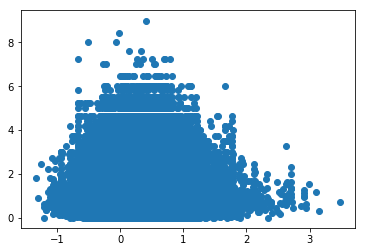

2.22045e-16 9.00234


In [37]:
plt.scatter(np.log10(alpha),ZF)
plt.show()
print(min(ZF), max(ZF))